In [407]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re


### Load Dataset

In this cell, we import the necessary libraries and load the dataset into a pandas DataFrame. We then display the first few rows of the DataFrame to get an initial look at the data.


In [408]:
# Load the dataset
df = pd.read_csv('gendered_data.csv')

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,seniority,desc_len,num_comp,headquarters_state,Lemmatized_Description,Agentic_Words,Communal_Words,Agentic_Count,Communal_Count,Gendered_Ratio
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,na,2536,0,CA,"Data Scientist Location : Albuquerque , NM Edu...",Required required Required proficient strong a...,team Generous our Our our our our our,16,8,2.000000
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,na,4783,0,MD,What You Will Do : I . General Summary The Hea...,Advanced strategic computational essential ana...,our support support team our team our support,23,8,2.875000
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,na,3461,0,FL,"KnowBe4 , Inc. is a high growth information se...",high Quantitative advanced unstructured extern...,our our team support understanding,12,5,2.400000
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,na,3883,3,WA,* Organization and Job ID * * Job ID : 310709 ...,computational advanced computational driving c...,Team understanding collaborative diverse inclu...,15,9,1.666667
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,na,2728,3,NY,Data Scientist Affinity Solutions / Marketing ...,innovative appropriate Advanced advanced keen ...,our team team our our our Support support supp...,9,10,0.900000


In [409]:
# Additional dataset information
print('Data Set Info')
print(df.info())


Data Set Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              742 non-null    int64  
 1   Job Title               742 non-null    object 
 2   Salary Estimate         742 non-null    object 
 3   Job Description         742 non-null    object 
 4   Rating                  742 non-null    float64
 5   Company Name            742 non-null    object 
 6   Location                742 non-null    object 
 7   Headquarters            742 non-null    object 
 8   Size                    742 non-null    object 
 9   Founded                 742 non-null    int64  
 10  Type of ownership       742 non-null    object 
 11  Industry                742 non-null    object 
 12  Sector                  742 non-null    object 
 13  Revenue                 742 non-null    object 
 14  Competitors             742 

In [410]:
# Describe the dataset
print("\nDescribe Data Set")
print(df.describe(include='all'))



Describe Data Set
        Unnamed: 0       Job Title              Salary Estimate  \
count   742.000000             742                          742   
unique         NaN             264                          416   
top            NaN  Data Scientist  $49K-$113K (Glassdoor est.)   
freq           NaN             131                            6   
mean    370.500000             NaN                          NaN   
std     214.341239             NaN                          NaN   
min       0.000000             NaN                          NaN   
25%     185.250000             NaN                          NaN   
50%     370.500000             NaN                          NaN   
75%     555.750000             NaN                          NaN   
max     741.000000             NaN                          NaN   

                                          Job Description      Rating  \
count                                                 742  742.000000   
unique                        

In [411]:
# Get unique values count for each column
print("\nUnique Values:")
print('Nunique: Counts number of distinct elements in specified axis. Returns Series with number of distinct elements')
print(df.nunique())




Unique Values:
Nunique: Counts number of distinct elements in specified axis. Returns Series with number of distinct elements
Unnamed: 0                742
Job Title                 264
Salary Estimate           416
Job Description           463
Rating                     31
Company Name              343
Location                  200
Headquarters              198
Size                        9
Founded                   102
Type of ownership          11
Industry                   60
Sector                     25
Revenue                    14
Competitors               128
hourly                      2
employer_provided           2
min_salary                114
max_salary                160
avg_salary                225
company_txt               343
job_state                  37
same_state                  2
age                       102
python_yn                   2
R_yn                        2
spark                       2
aws                         2
excel                       2
job

In [412]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0                0
Job Title                 0
Salary Estimate           0
Job Description           0
Rating                    0
Company Name              0
Location                  0
Headquarters              0
Size                      0
Founded                   0
Type of ownership         0
Industry                  0
Sector                    0
Revenue                   0
Competitors               0
hourly                    0
employer_provided         0
min_salary                0
max_salary                0
avg_salary                0
company_txt               0
job_state                 0
same_state                0
age                       0
python_yn                 0
R_yn                      0
spark                     0
aws                       0
excel                     0
job_simp                  0
seniority                 0
desc_len                  0
num_comp                  0
headquarters_state        0
Lemmatized_Description    0
Age

### Distribution of Categorical Features

This cell visualizes the distribution of each categorical feature using count plots. These plots help us understand the frequency of different categories within each feature.


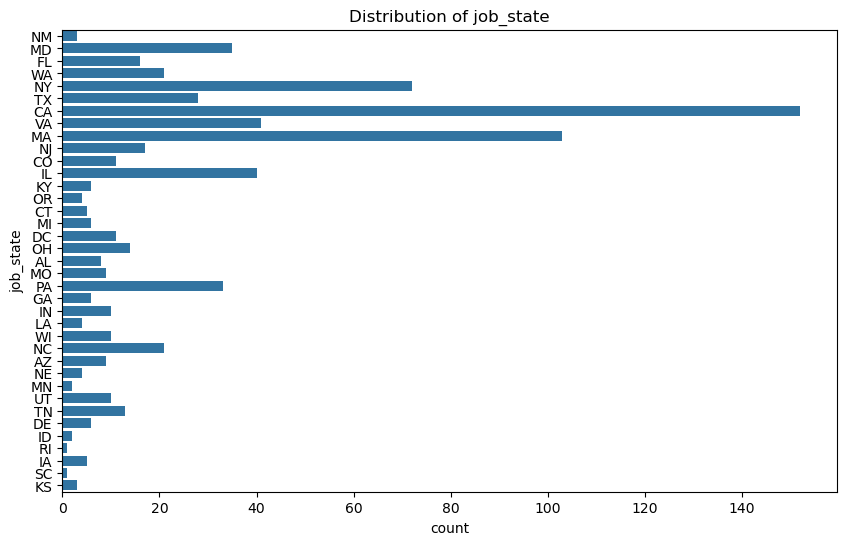

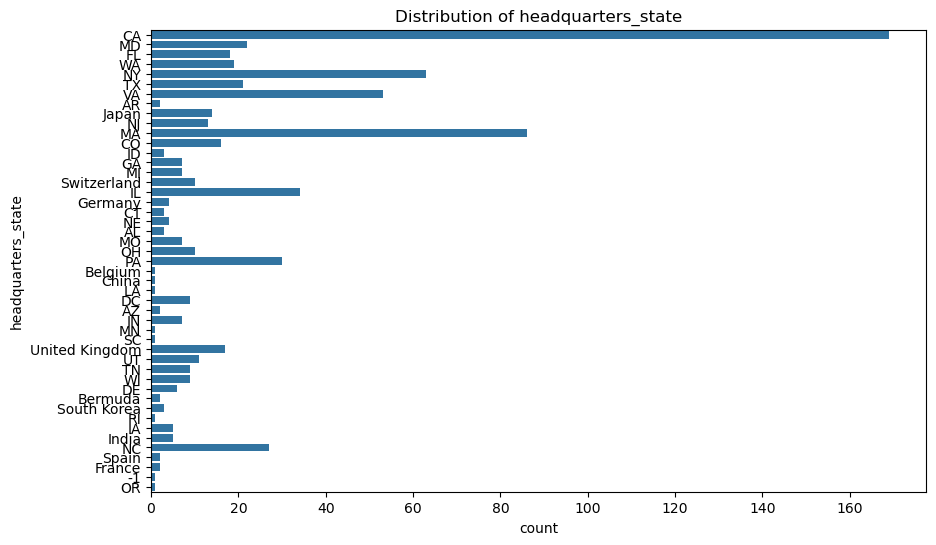

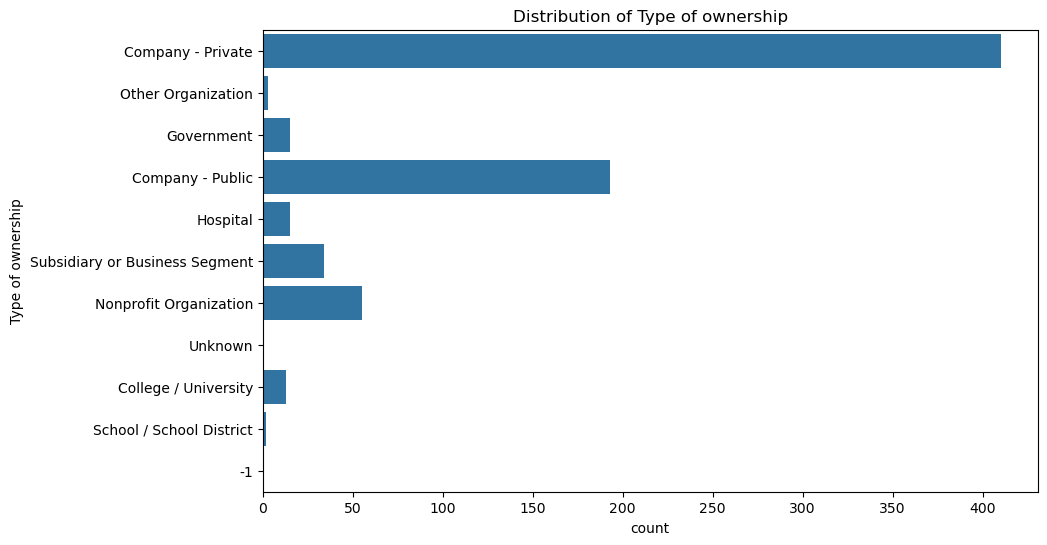

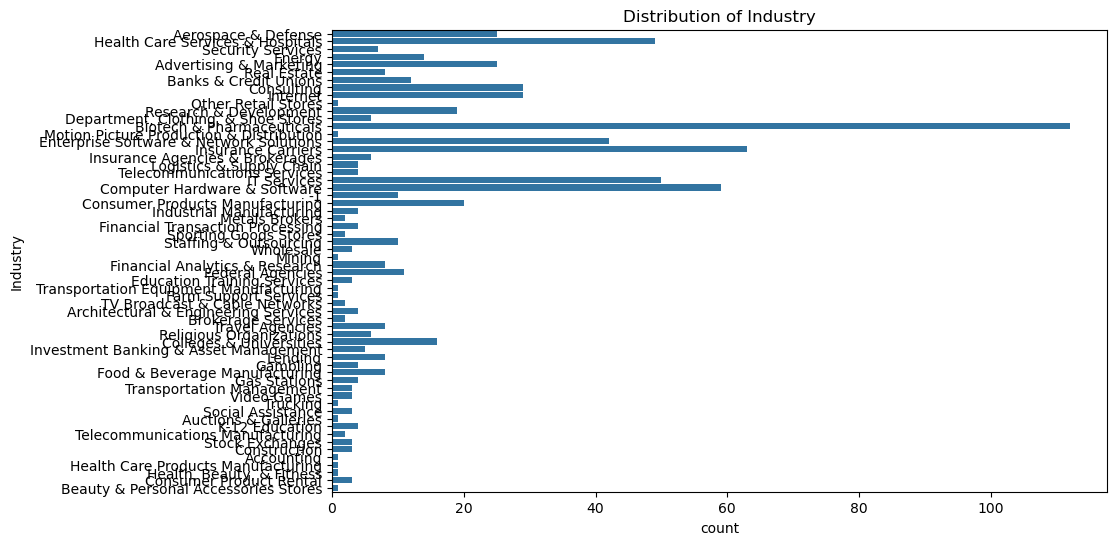

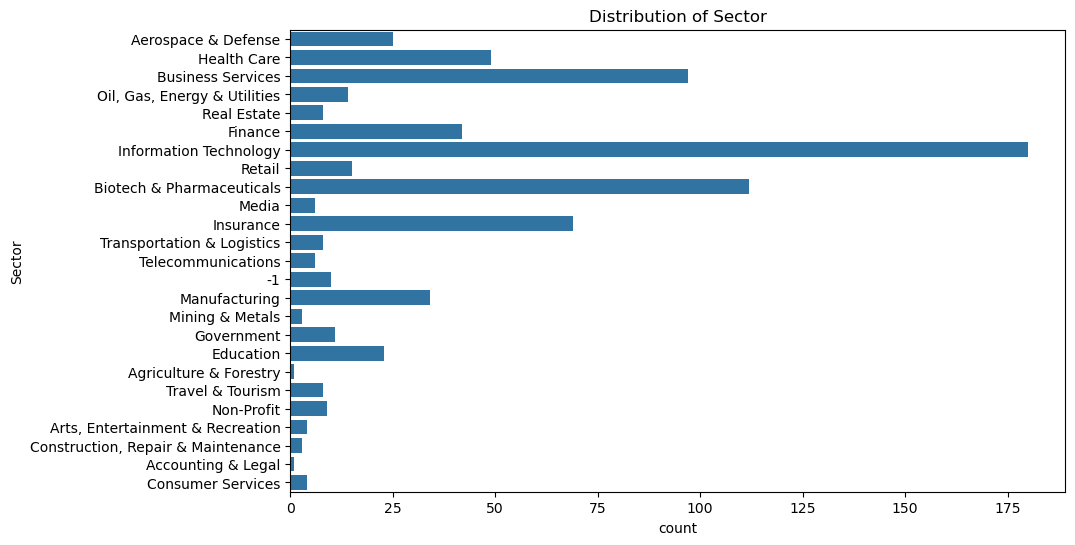

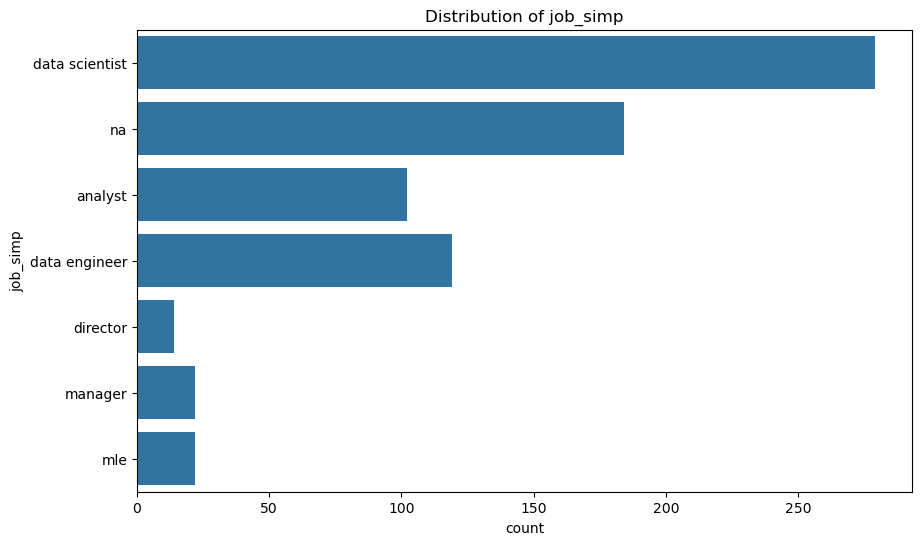

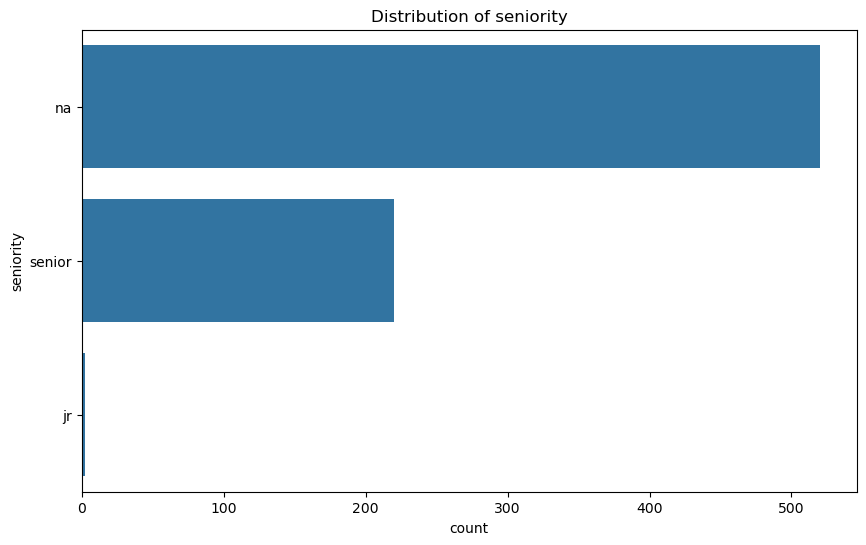

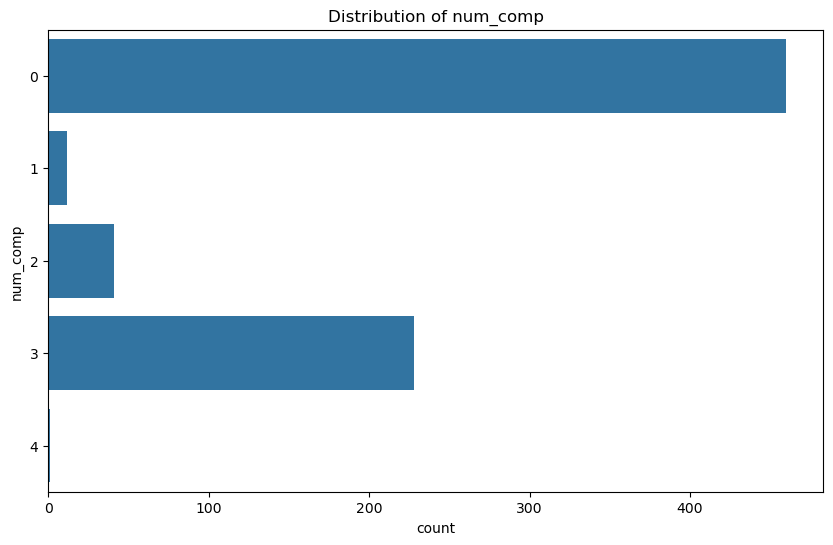

In [413]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features to analyze
categorical_features = [
#    'num_comp','Type of ownership','Industry', 'Sector', 'Size', 'location_state','headquarters_state', 'job_simp', 'seniority']
'job_state','headquarters_state', 'Type of ownership', 'Industry', 'Sector', 'job_simp', 'seniority', 'num_comp'
]

# Plot distribution of each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()



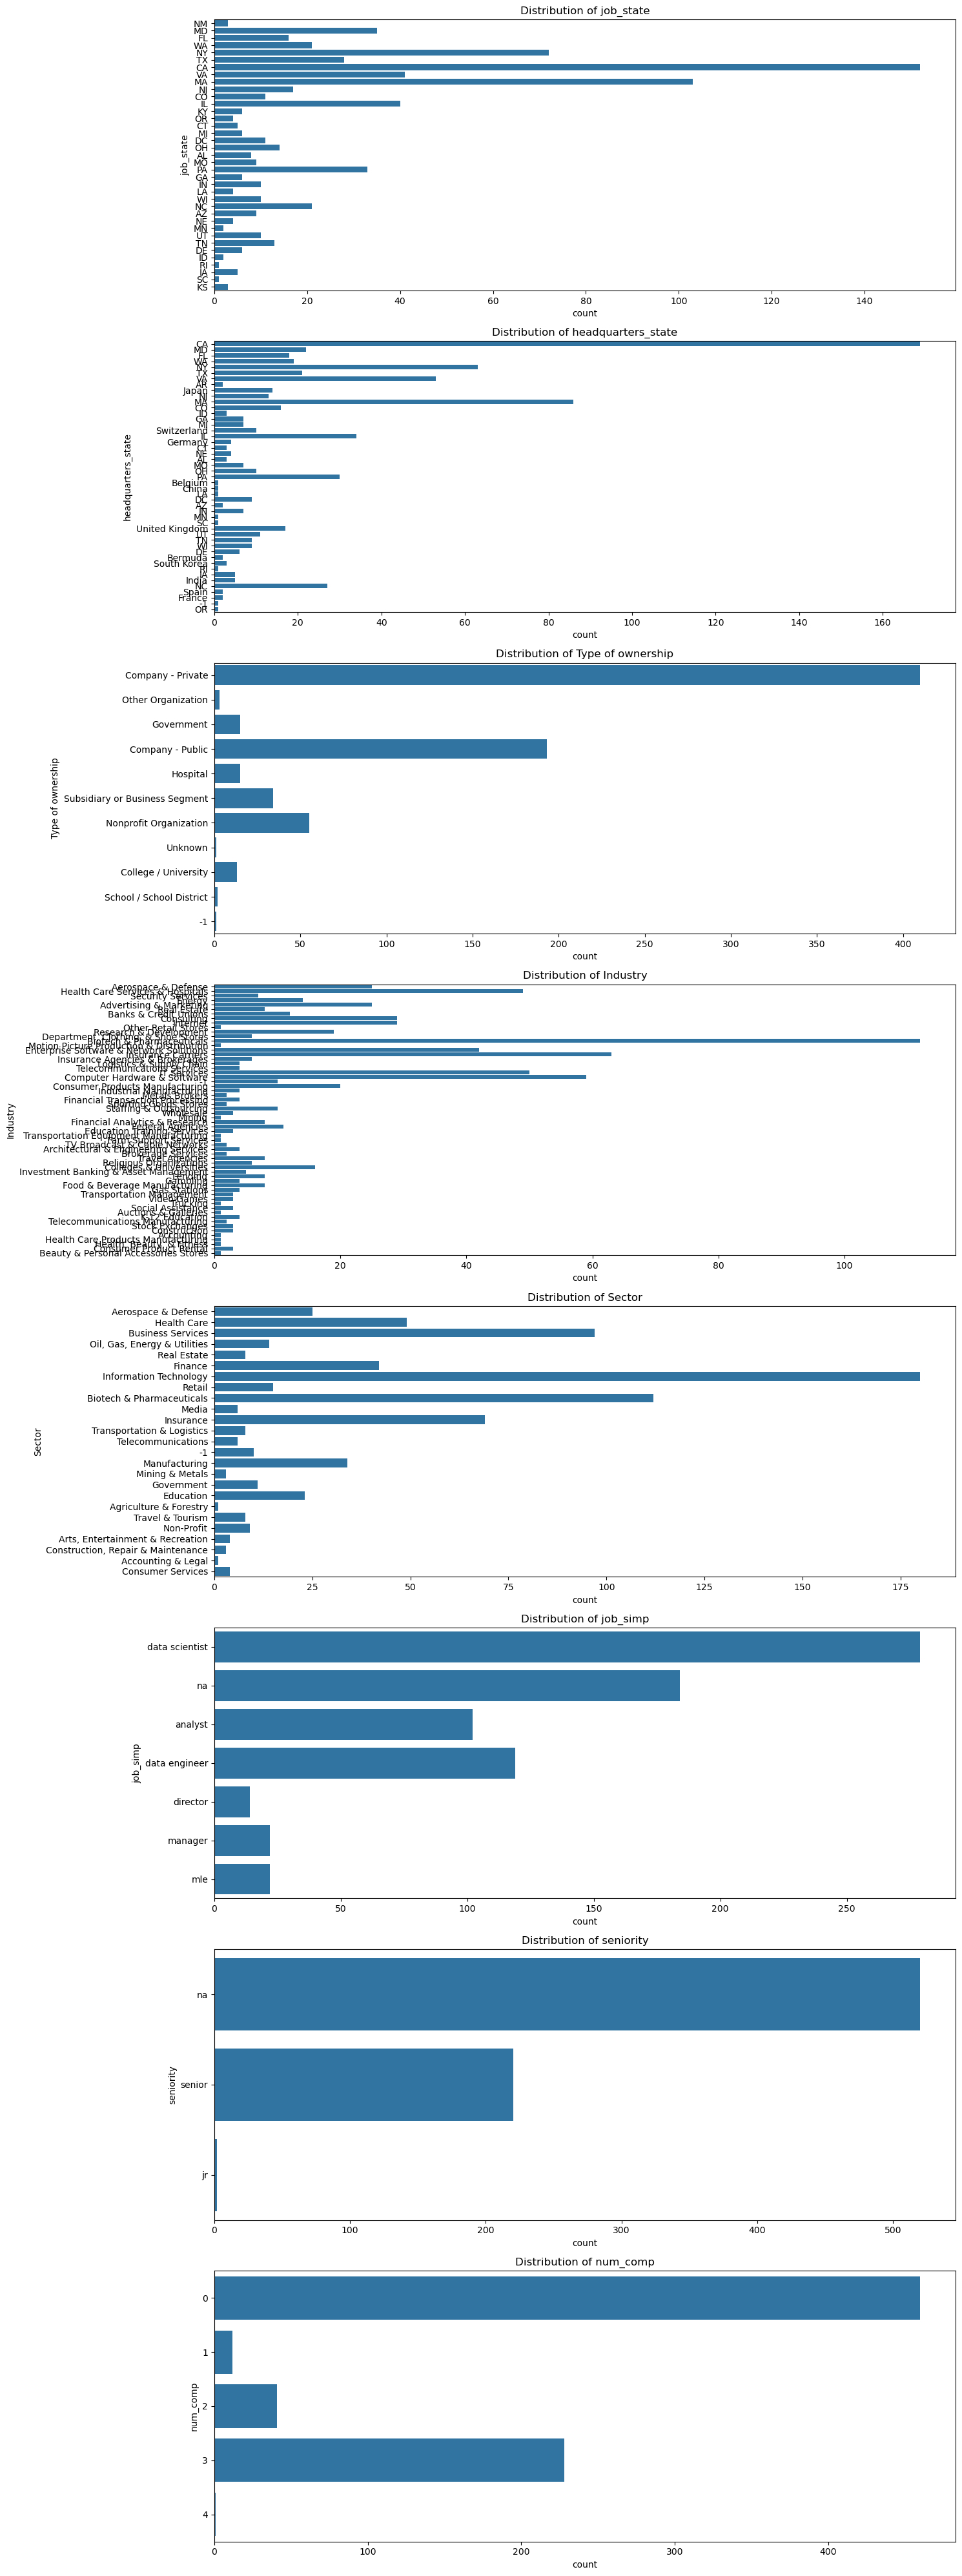

In [610]:
# Summarize all distributions


# List of categorical features to analyze
categorical_features = [
    'job_state', 'headquarters_state', 'Type of ownership', 'Industry', 'Sector', 'job_simp', 'seniority', 'num_comp'
]

# Number of features
n_features = len(categorical_features)

# Determine the grid size for subplots
ncols = 1  # Number of columns in the grid
nrows = (n_features + ncols - 1) // ncols  # Calculate the number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot distribution of each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


### Binary Features

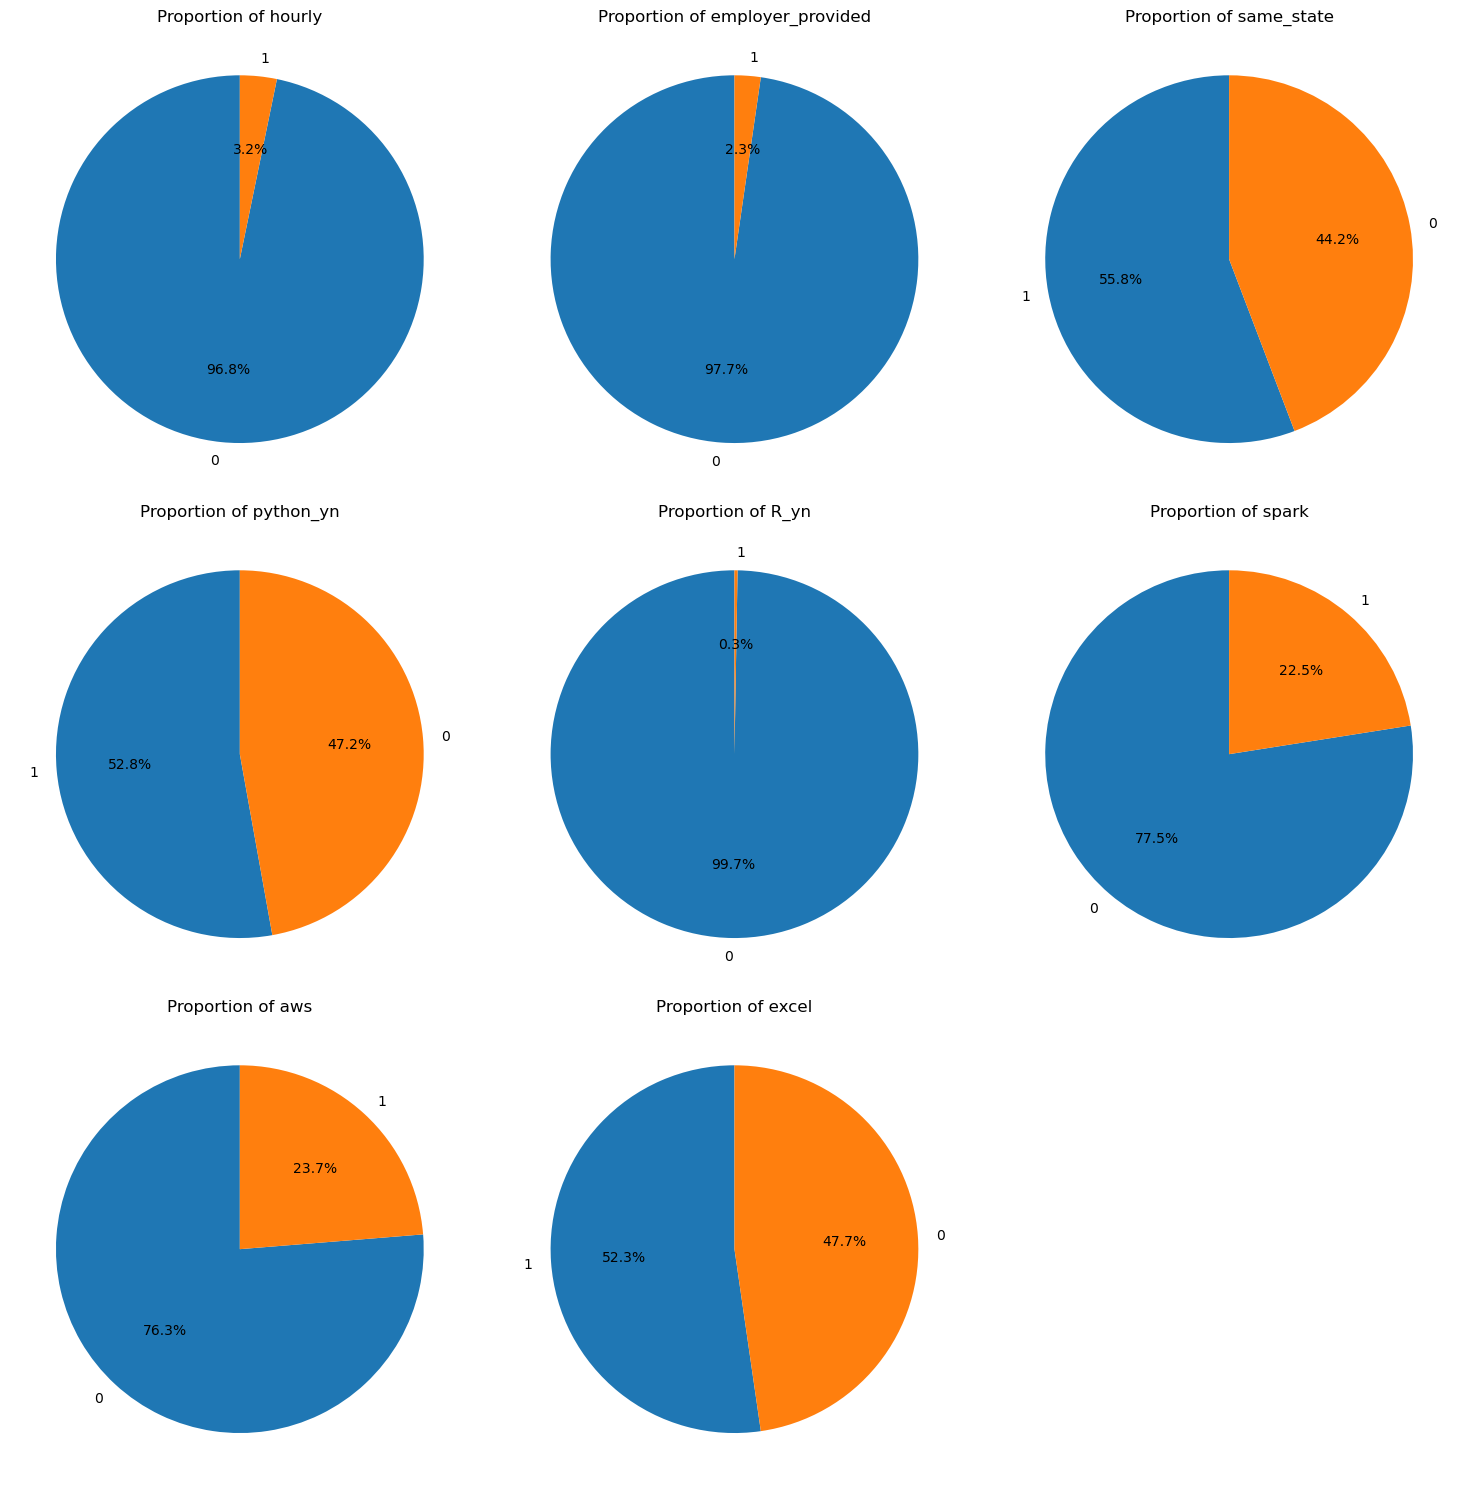

In [ ]:
# List of features with only 2 unique values
binary_features = ['hourly', 'employer_provided', 'same_state', 'python_yn', 'R_yn', 'spark', 'aws', 'excel']

# Determine the number of rows and columns for subplots
num_features = len(binary_features)
num_cols = 3  # Adjust this number based on how many pie charts you want per row
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each pie chart
for i, feature in enumerate(binary_features):
    ax = axes[i]
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set_title(f'Proportion of {feature}')
    ax.set_ylabel('')  # Hide y-label for pie charts

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Distribution of Quantitative Features

In this cell, we plot the distribution of quantitative features using histograms with Kernel Density Estimation (KDE). This helps us understand the spread and central tendencies of these numerical features.


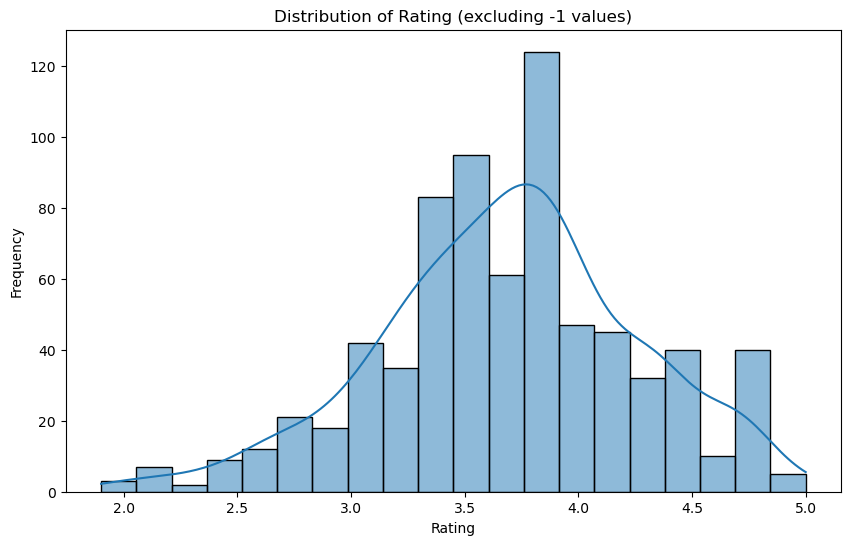

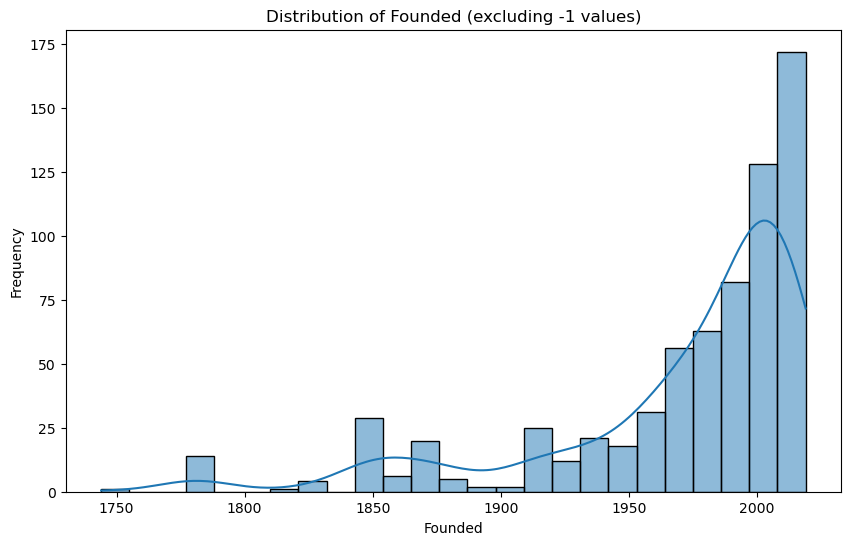

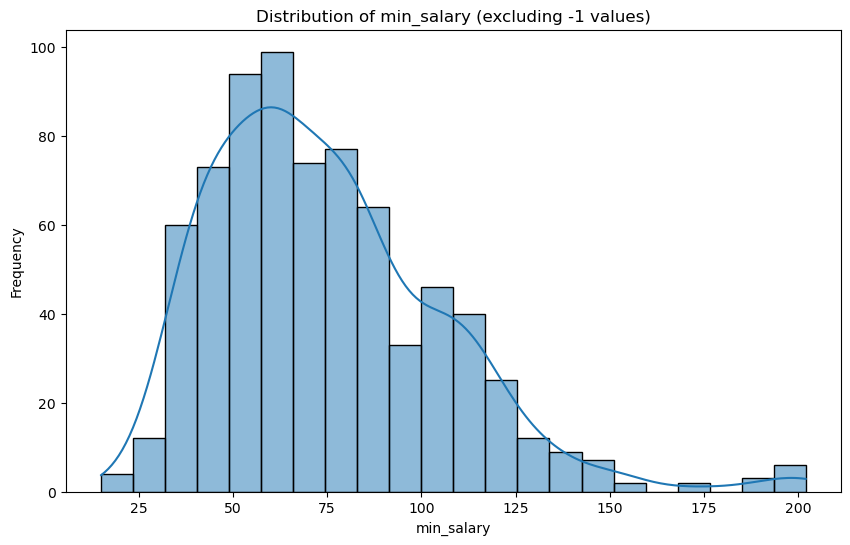

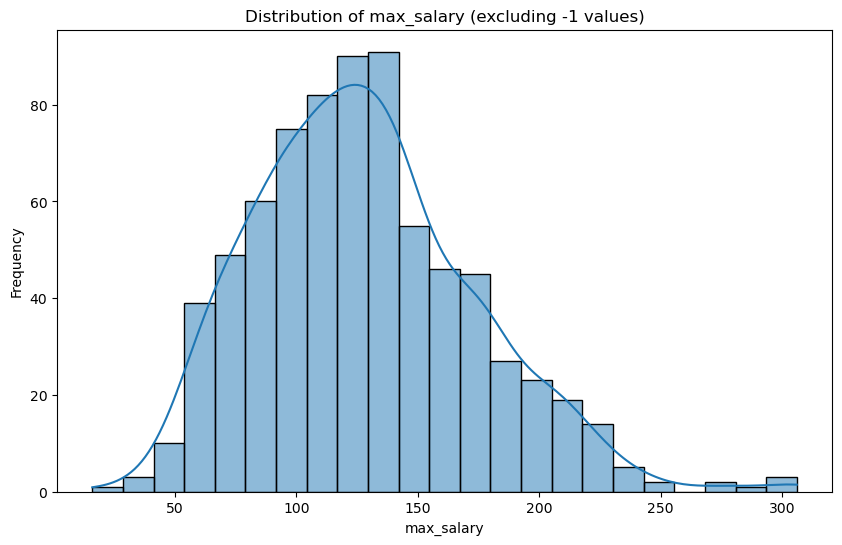

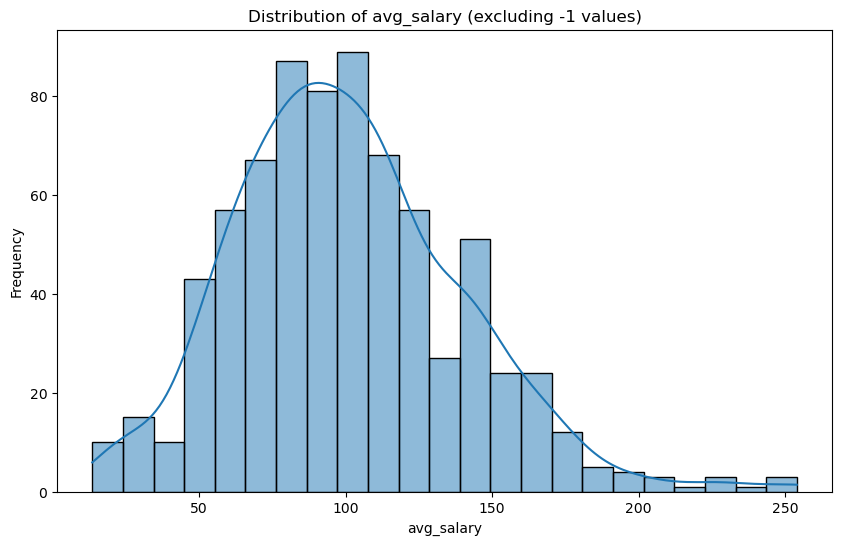

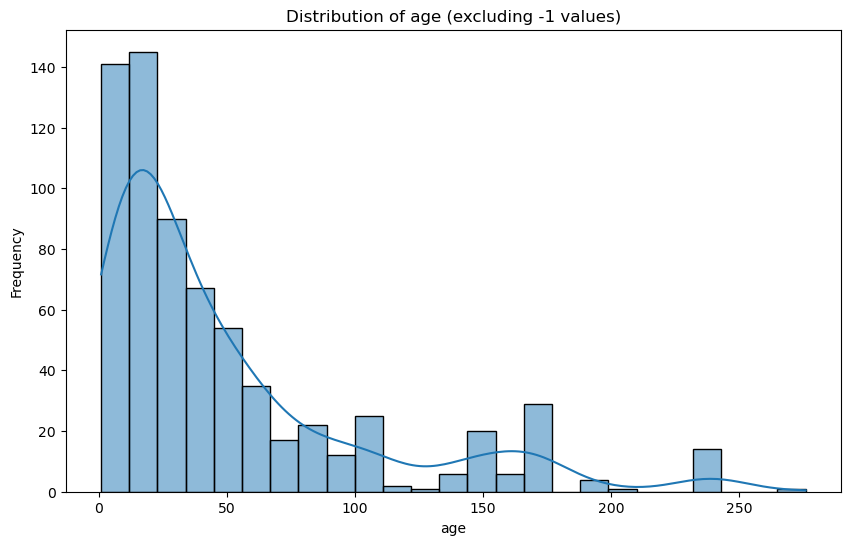

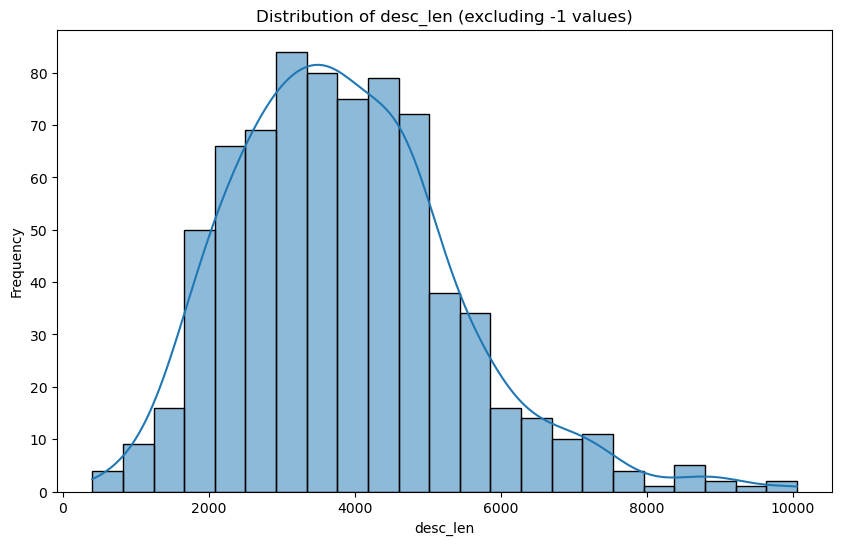

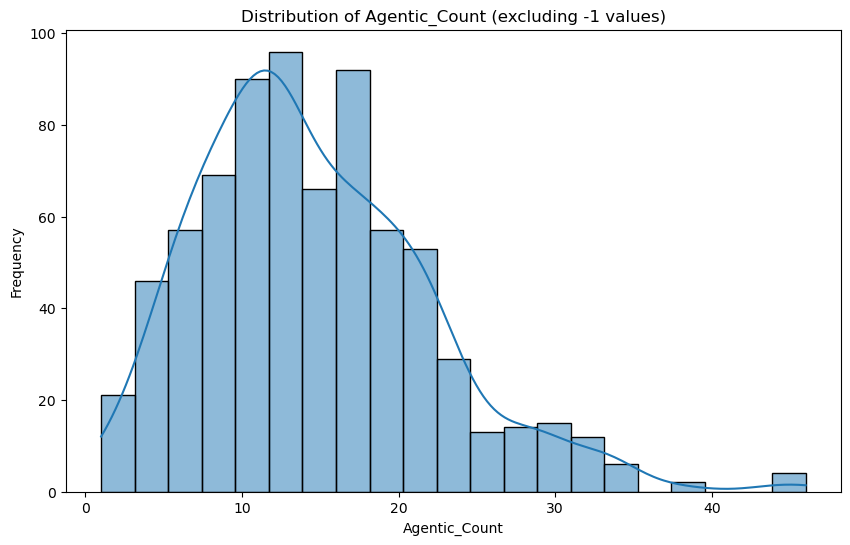

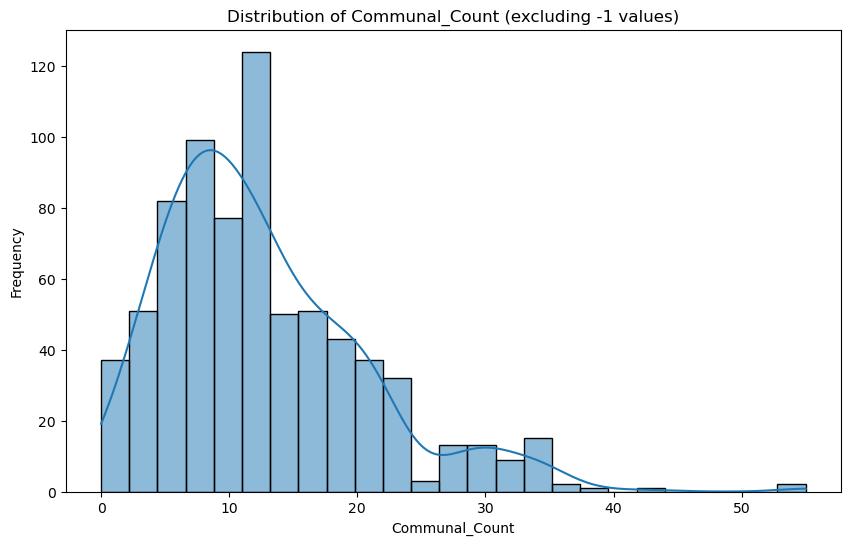

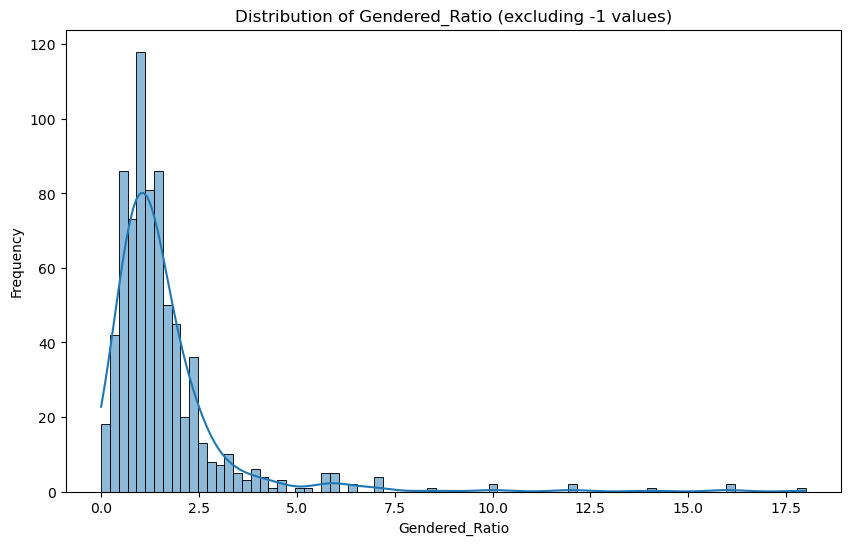

In [ ]:
quantitative_features = [
    'Rating', 'Founded', 'min_salary', 
    'max_salary', 'avg_salary', 'age', 
    'desc_len', 
    'Agentic_Count', 'Communal_Count', 'Gendered_Ratio'
]

# Plot distribution of each quantitative feature
for feature in quantitative_features:
    plt.figure(figsize=(10, 6))
    
    # Exclude values that are -1
    data_to_plot = df[df[feature] != -1][feature]
    
    # Plot histogram
    sns.histplot(data_to_plot, kde=True)
    plt.title(f'Distribution of {feature} (excluding -1 values)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


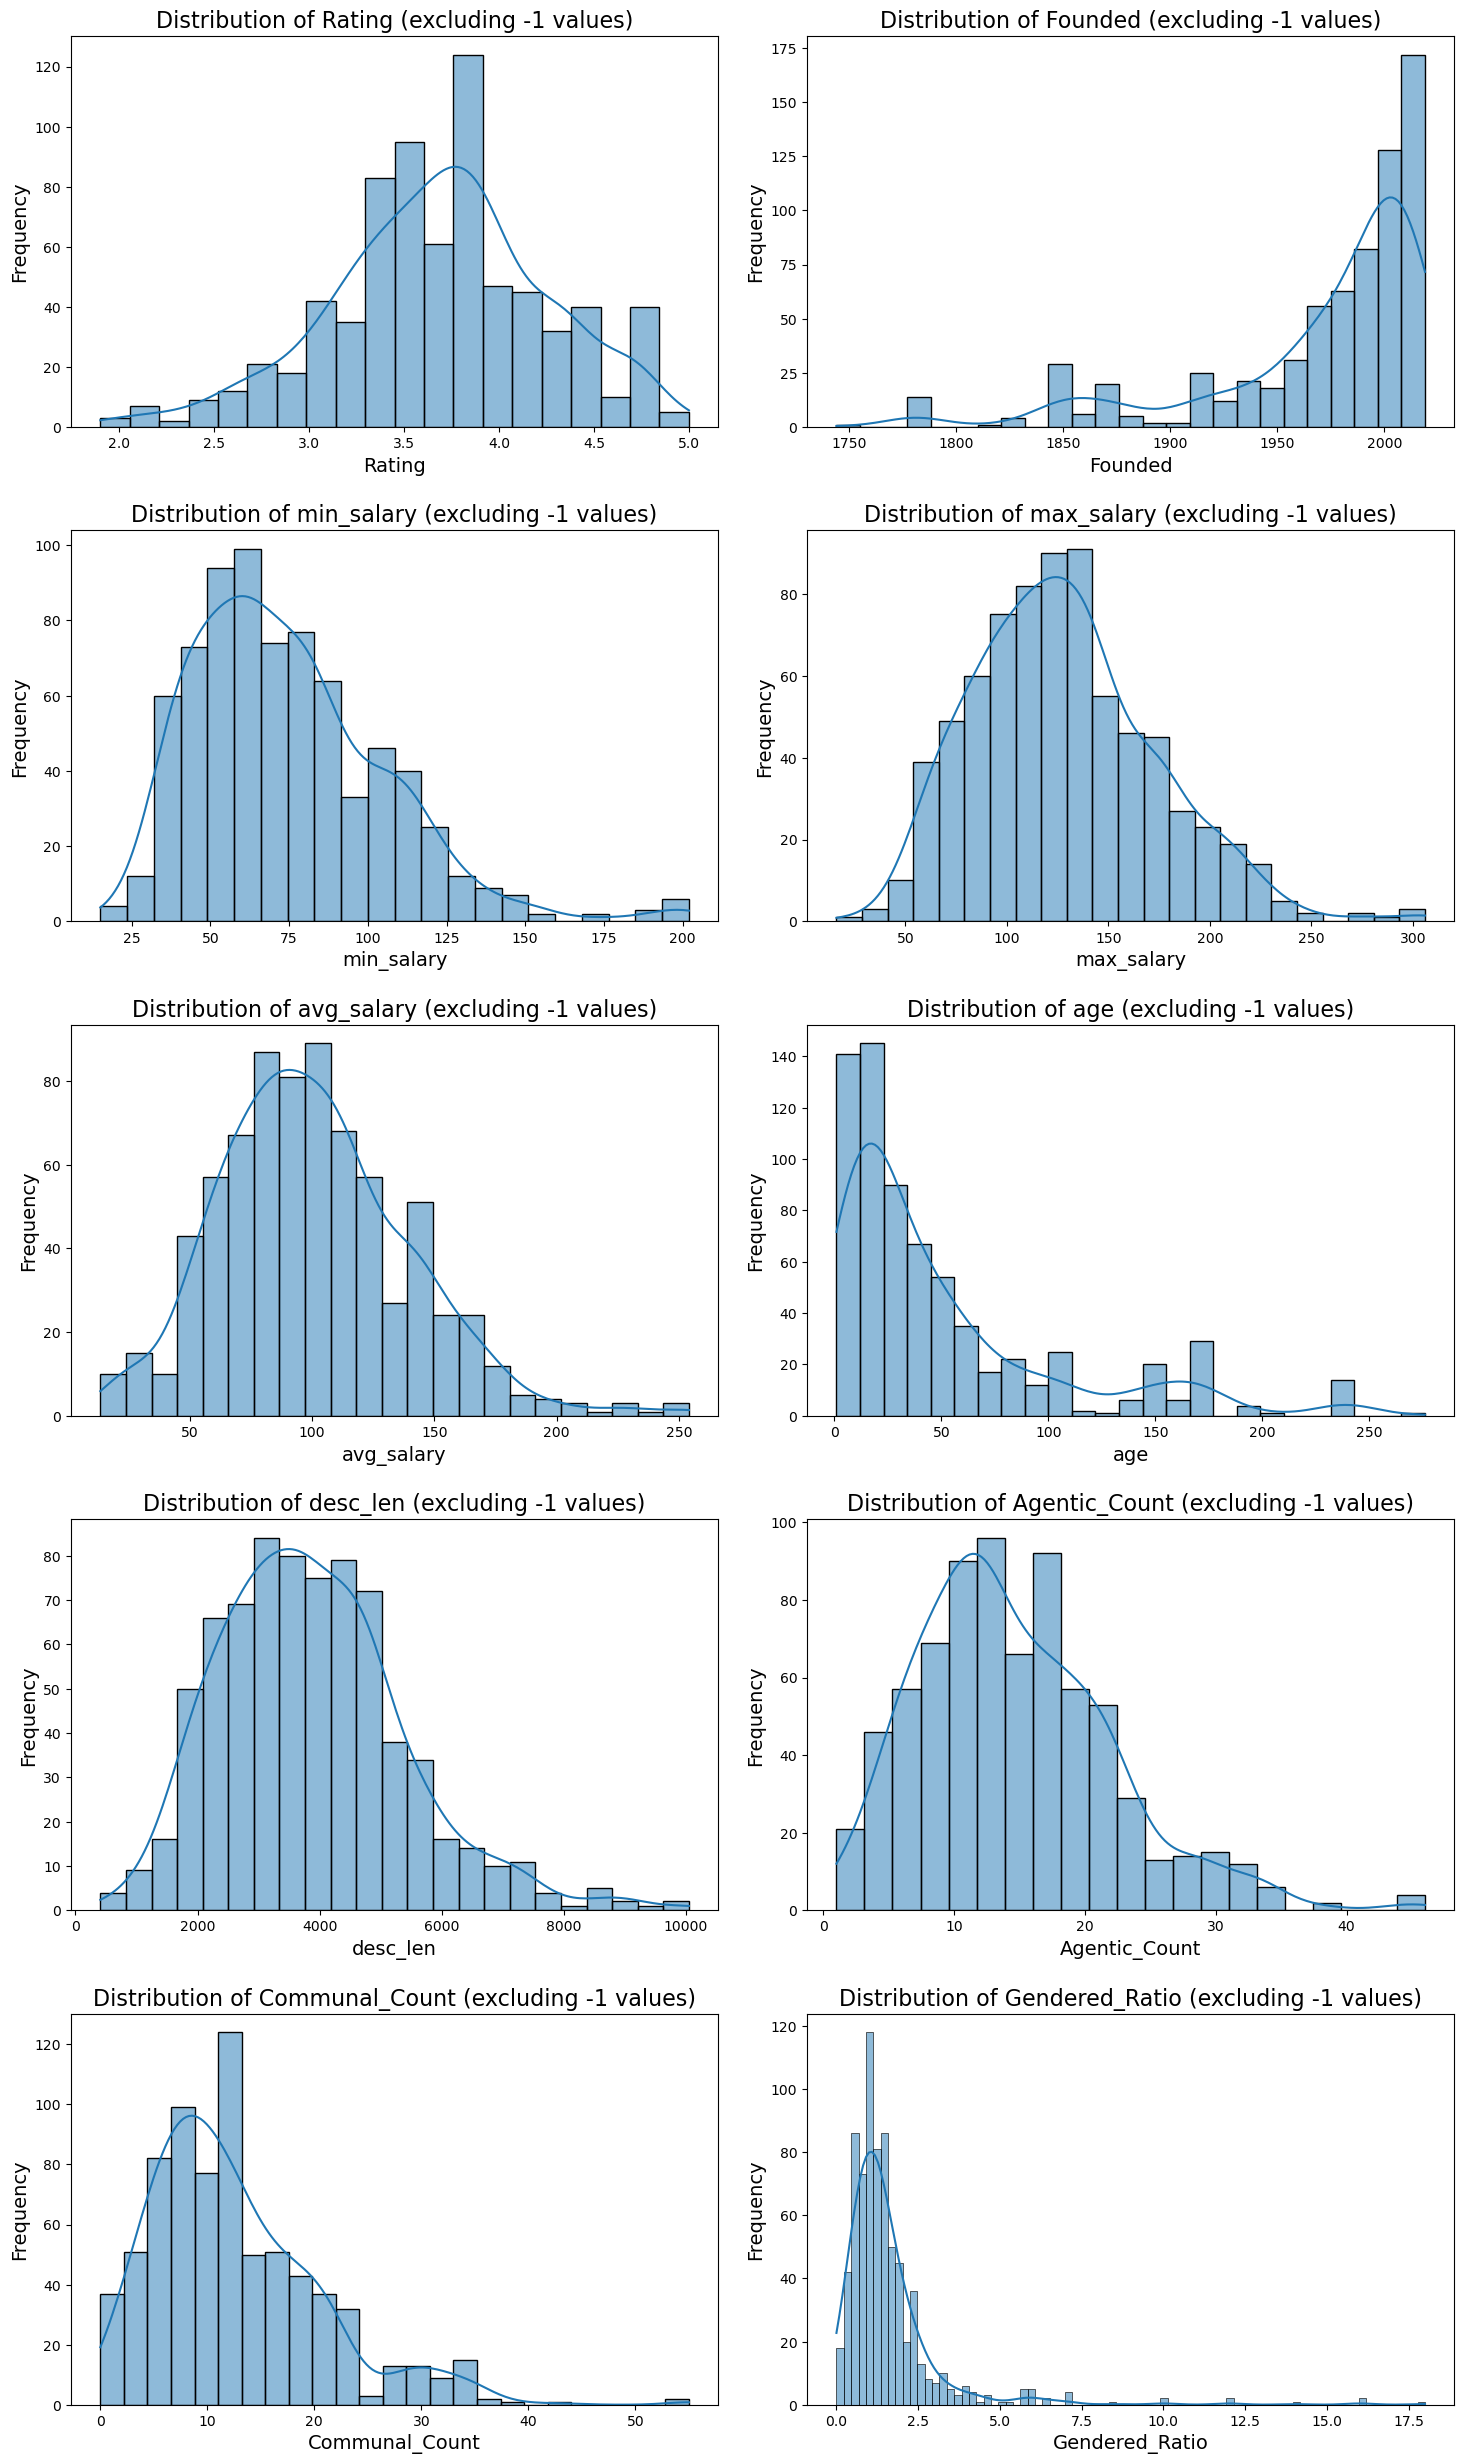

In [633]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of quantitative features to analyze
quantitative_features = [
    'Rating', 'Founded', 'min_salary', 
    'max_salary', 'avg_salary', 'age', 
    'desc_len', 
    'Agentic_Count', 'Communal_Count', 'Gendered_Ratio'
]

# Number of features
n_features = len(quantitative_features)

# Determine the grid size for subplots
ncols = 2  # Number of columns in the grid
nrows = (n_features + ncols - 1) // ncols  # Calculate the number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot distribution of each quantitative feature
for i, feature in enumerate(quantitative_features):
    # Exclude values that are -1
    data_to_plot = df[df[feature] != -1][feature]
    
    # Plot histogram
    sns.histplot(data_to_plot, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} (excluding -1 values)', fontsize=16)
    axes[i].set_xlabel(feature, fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)
    
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout(pad=2.0)  # Adjust padding as needed

# Show the combined plot
plt.show()


### Correlation Heatmap

This cell calculates and visualizes the correlation matrix for selected features. The heatmap shows the relationships between these features, highlighting any strong correlations.


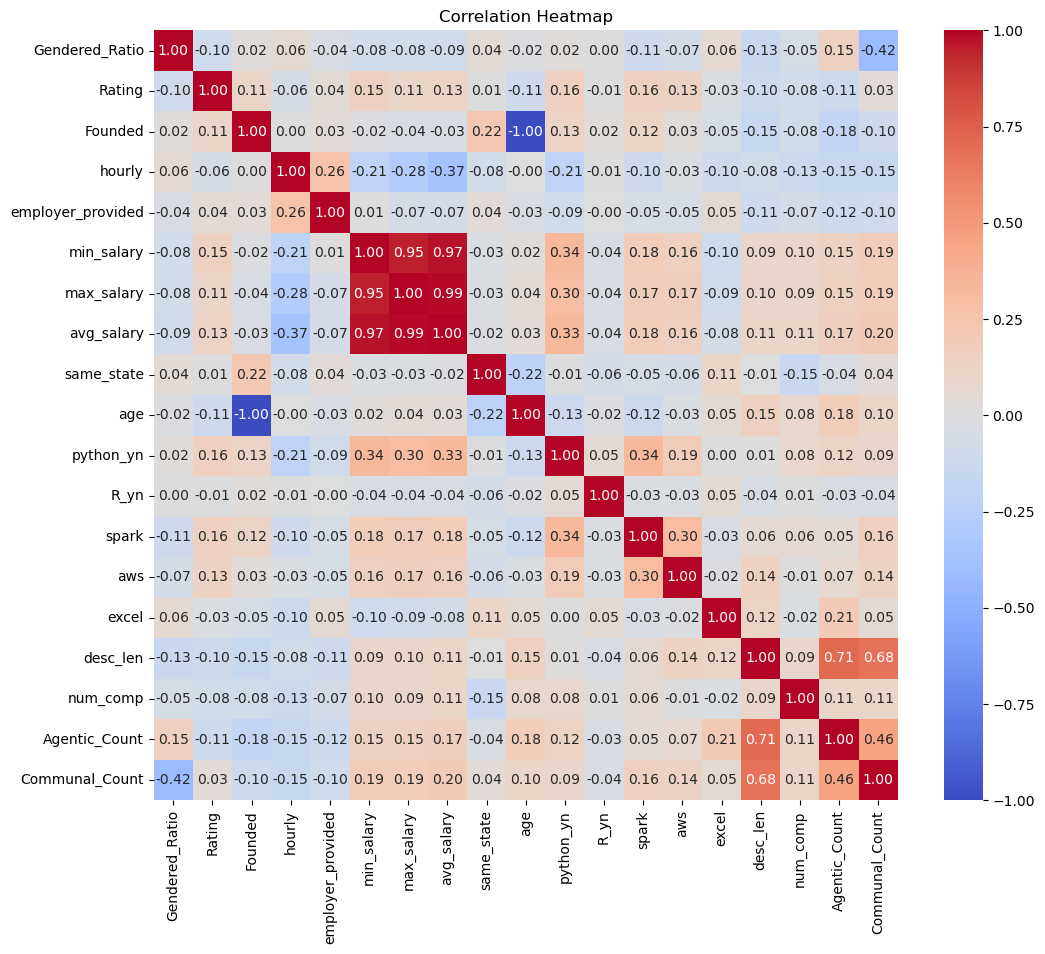

In [634]:

# List of numerical columns to include in the correlation heatmap
numerical_columns = [
    'Gendered_Ratio','Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary', 
    'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 
    'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'num_comp', 
    'Agentic_Count', 'Communal_Count'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_columns]

# Exclude rows where any numerical column has the value -1
df_numerical = df_numerical[~(df_numerical == -1).any(axis=1)]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



### Text Processing (TF-IDF)

In this cell, we use TF-IDF to convert job descriptions into a numerical format. TF-IDF helps in capturing the importance of words in the context of the entire dataset.


In [635]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the job descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Lemmatized_Description'].fillna(''))

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the shape of the TF-IDF matrix
tfidf_df.shape


(742, 9700)

### Encode Categorical Variables

In this cell, we use Label Encoding to convert categorical features into numerical format. This encoding is essential for feeding these features into machine learning models.


In [636]:

from sklearn.preprocessing import LabelEncoder

# List of categorical features to encode
categorical_features = [
    'job_state', 'headquarters_state', 'Type of ownership', 'Industry',
    'Sector', 'job_simp', 'seniority', 'num_comp'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_features:
    df[f'{feature}_encoded'] = label_encoder.fit_transform(df[feature].astype(str))

print(df[[f'{feature}_encoded' for feature in categorical_features]].head())



   job_state_encoded  headquarters_state_encoded  Type of ownership_encoded  \
0                 24                           6                          2   
1                 17                          24                          7   
2                  7                          12                          2   
3                 35                          45                          4   
4                 25                          31                          2   

   Industry_encoded  Sector_encoded  job_simp_encoded  seniority_encoded  \
0                 3               2                 2                  1   
1                28              12                 2                  1   
2                46               6                 2                  1   
3                18              19                 2                  1   
4                 2               6                 2                  1   

   num_comp_encoded  
0                 0  
1                 0  
2 

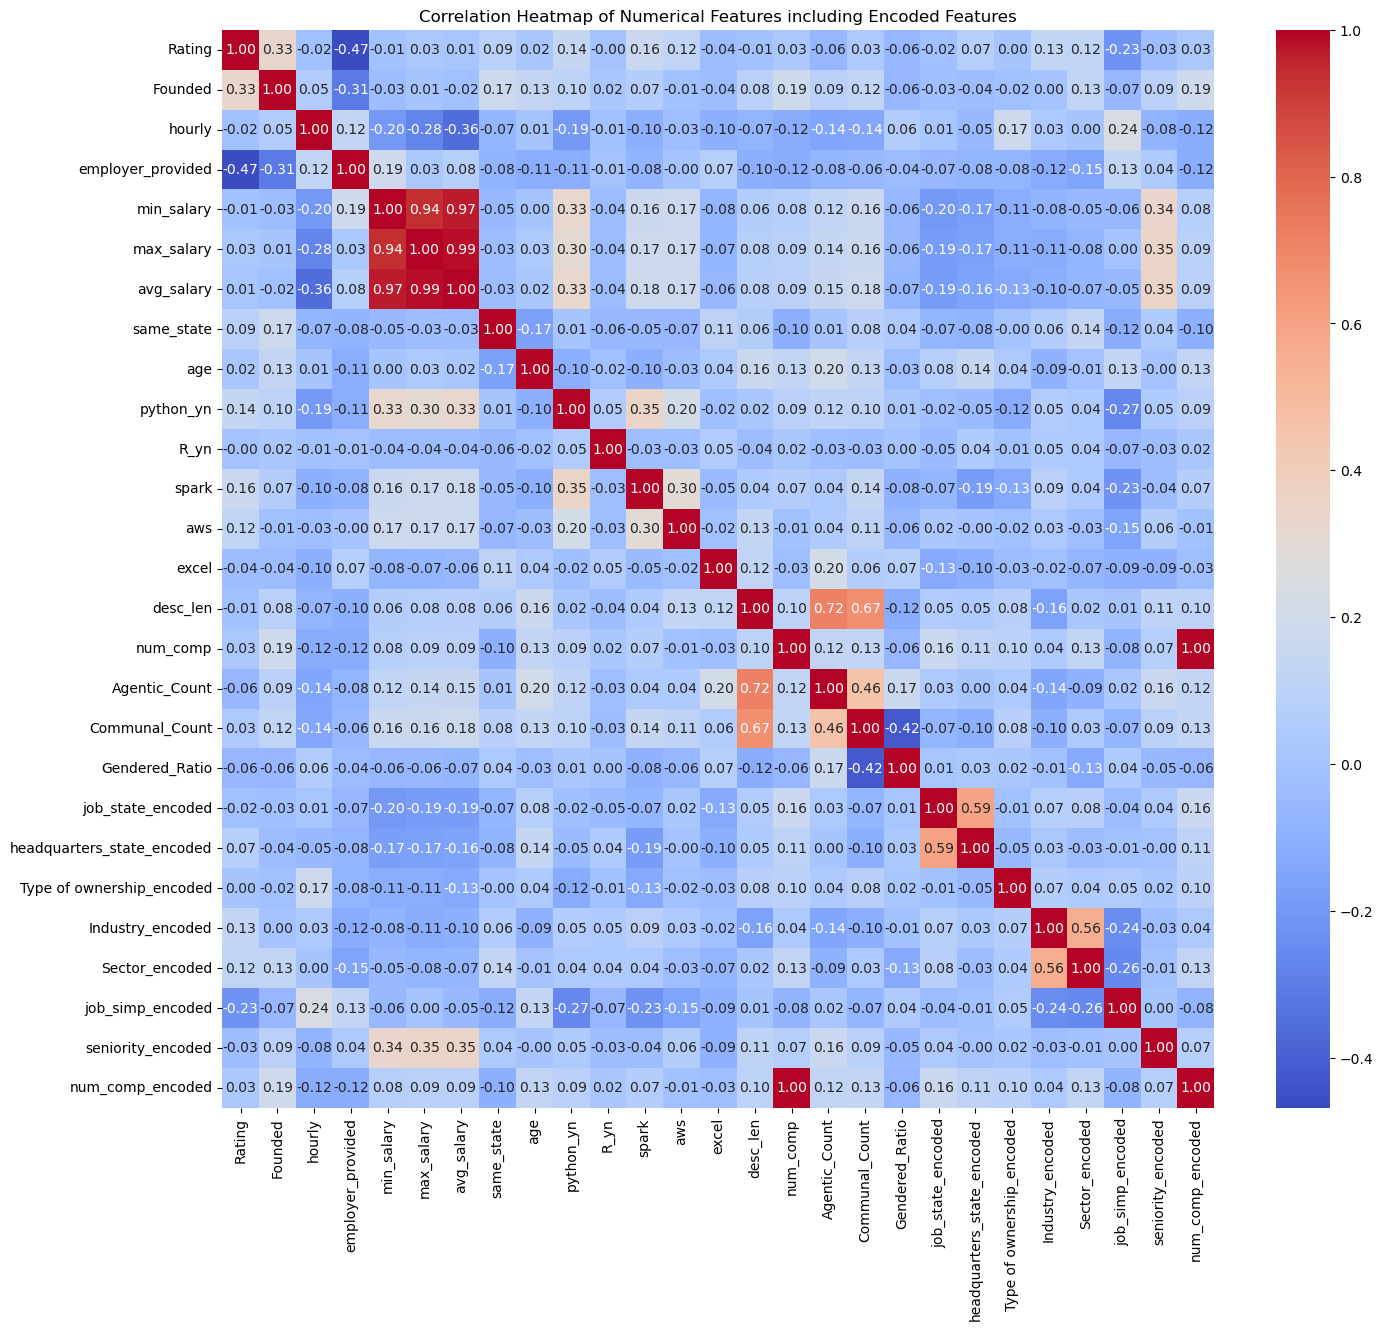

In [637]:
# List of numerical columns to include in the correlation heatmap
numerical_columns = [
    'Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary', 
    'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 
    'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'num_comp', 
    'Agentic_Count', 'Communal_Count', 'Gendered_Ratio', 
    'job_state_encoded', 'headquarters_state_encoded', 'Type of ownership_encoded',
    'Industry_encoded', 'Sector_encoded', 'job_simp_encoded', 
    'seniority_encoded', 'num_comp_encoded'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_columns]


# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features including Encoded Features')
plt.show()

----

### Creating 'Gender Bias' Target Column

In this cell, we create a binary 'Gender Bias' target column based on statistical measures such as the mean or standard deviation to determine a dynamic threshold.


In [638]:
# Calculate mean and standard deviation of the ratio
df['Ratio'] = df['Communal_Count'] / (df['Agentic_Count'] + 1e-10)  # Add small value to avoid division by zero
mean_ratio = df['Ratio'].mean()
std_ratio = df['Ratio'].std()

# Define a threshold based on mean + standard deviation
bias_threshold = mean_ratio + std_ratio

# Create 'Gender Bias' target column
df['Gender_Bias'] = np.where(df['Ratio'] > bias_threshold, 1, 0)

# Check the distribution of the target column
print(df['Gender_Bias'].value_counts())


Gender_Bias
0    682
1     60
Name: count, dtype: int64


The output distribution of the Gender_Bias column shows that you have a binary target with 682 instances of 0 (not biased) and 60 instances of 1 (biased). This indicates that the bias threshold you set (mean + standard deviation) has classified most of the data as not biased.

Interpreting and Refining the Threshold
1. Evaluate the Threshold
    - The current threshold might be too high or too low. If most data points are classified as 0, you might want to adjust the threshold:

    - Increase Sensitivity: Lower the threshold to classify more data points as biased.
    - Decrease Sensitivity: Increase the threshold to classify fewer data points as biased.
2. Adjust the Threshold
    - You can adjust the threshold based on your needs. For example:

    - Use Percentiles: If the current threshold is too strict, you can use a lower percentile for the threshold.
    - Custom Threshold: Set a threshold based on domain knowledge or specific criteria.

In [639]:
# Calculate the 80th percentile of the ratio
percentile_threshold = np.percentile(df['Ratio'], 80)

# Create 'Gender Bias' target column with the new threshold
df['Gender_Bias'] = np.where(df['Ratio'] > percentile_threshold, 1, 0)

# Check the distribution of the target column
print(df['Gender_Bias'].value_counts())

Gender_Bias
0    593
1    149
Name: count, dtype: int64


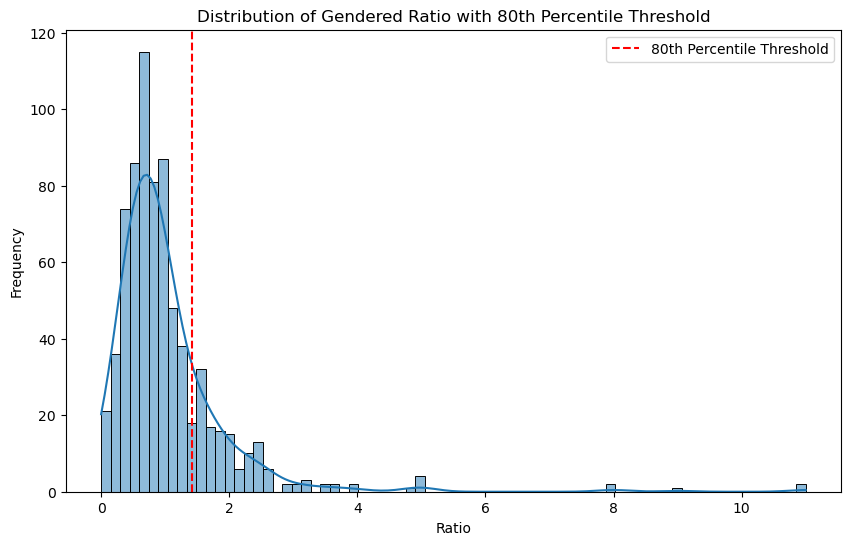

In [640]:

# Plot the distribution of the Ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['Ratio'], kde=True)
plt.axvline(percentile_threshold, color='r', linestyle='--', label='80th Percentile Threshold')
plt.title('Distribution of Gendered Ratio with 80th Percentile Threshold')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Create 'Gender_Bias' Column

We create a new column called 'Gender_Bias' with random binary values (0 or 1) for demonstration purposes. This will allow us to proceed with the analysis.


In [641]:
import numpy as np

# Create a 'Gender_Bias' column with random binary values (0 or 1) for demonstration purposes
np.random.seed(42)  # For reproducibility
df['Gender_Bias'] = np.random.randint(0, 2, size=len(df))

# Verify the new column
df[['Gender_Bias']].head()


,Gender_Bias
0,0
1,1
2,0
3,0
4,0


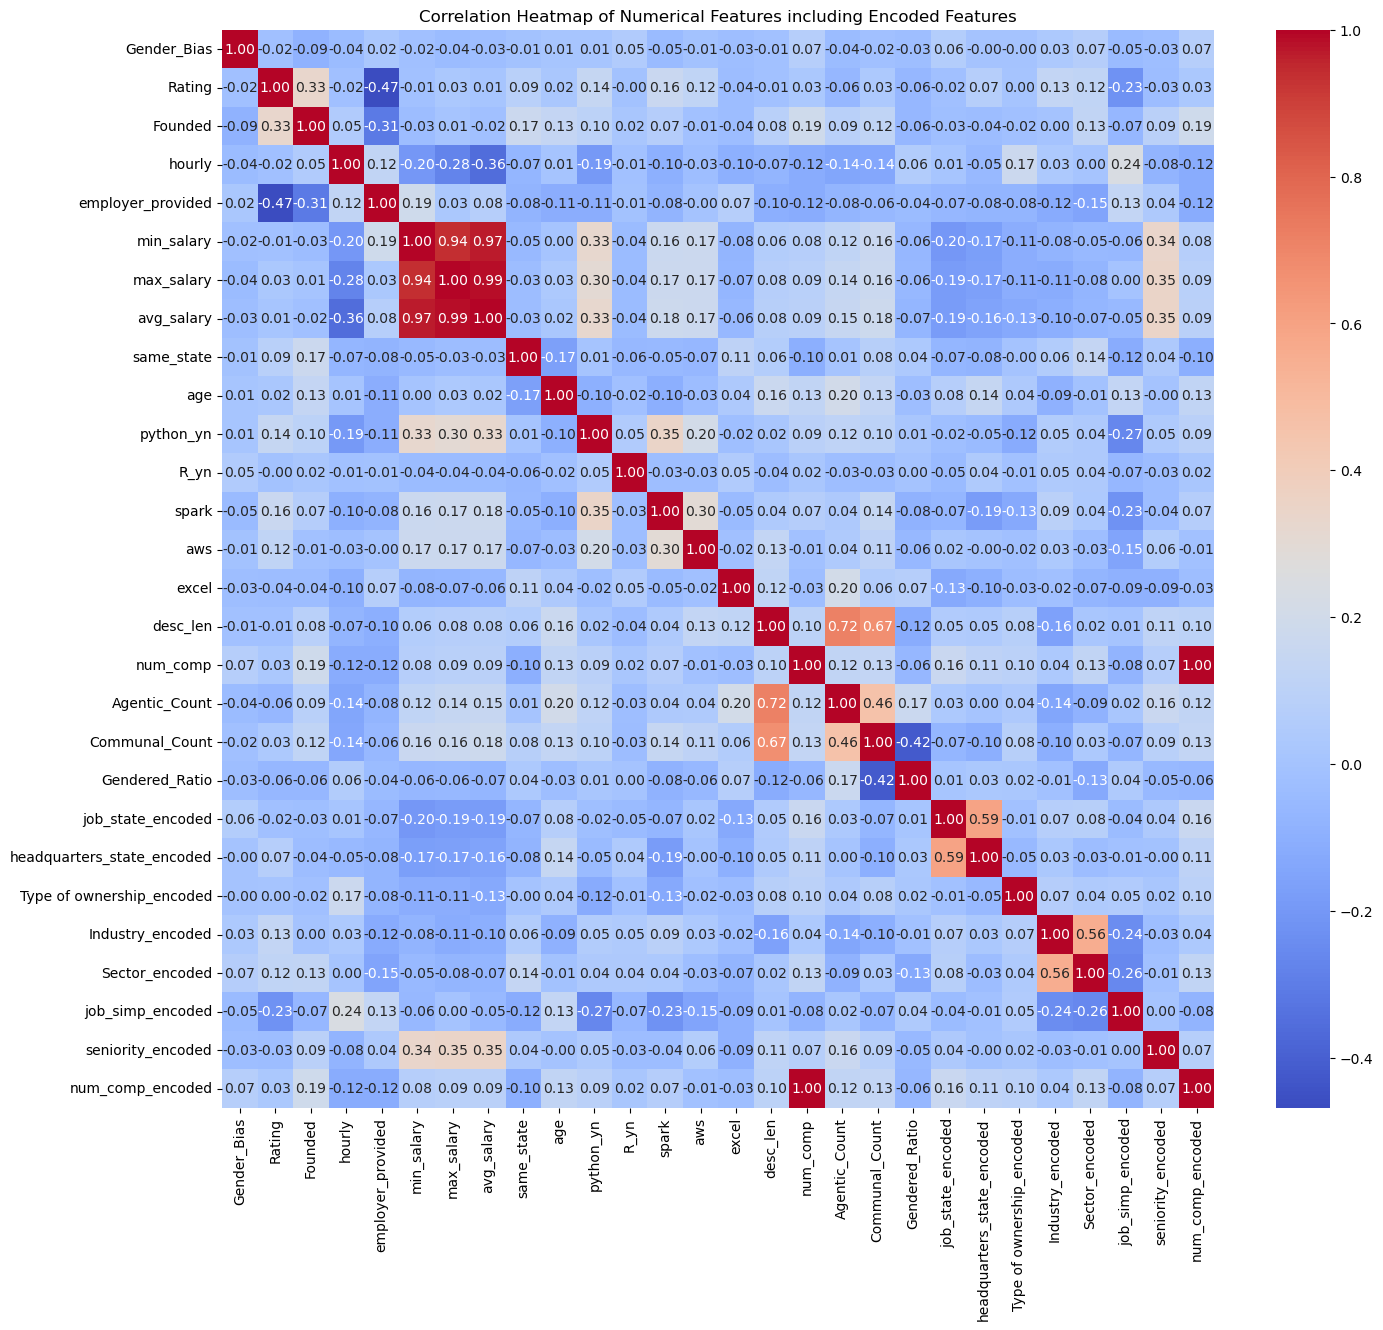

In [642]:
# List of numerical columns to include in the correlation heatmap
numerical_columns = [
    'Gender_Bias','Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary', 
    'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 
    'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'num_comp', 
    'Agentic_Count', 'Communal_Count', 'Gendered_Ratio', 
    'job_state_encoded', 'headquarters_state_encoded', 'Type of ownership_encoded',
    'Industry_encoded', 'Sector_encoded', 'job_simp_encoded', 
    'seniority_encoded', 'num_comp_encoded'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_columns]


# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features including Encoded Features')
plt.show()

In [643]:
correlation_with_target = df_numerical.corrwith(df['Gender_Bias']).abs()
print(correlation_with_target)


Gender_Bias                   1.000000
Rating                        0.019279
Founded                       0.087582
hourly                        0.038890
employer_provided             0.020027
min_salary                    0.018933
max_salary                    0.042754
avg_salary                    0.027788
same_state                    0.008069
age                           0.012323
python_yn                     0.010912
R_yn                          0.049658
spark                         0.047334
aws                           0.006549
excel                         0.031816
desc_len                      0.014486
num_comp                      0.072335
Agentic_Count                 0.039424
Communal_Count                0.016510
Gendered_Ratio                0.027589
job_state_encoded             0.064856
headquarters_state_encoded    0.001019
Type of ownership_encoded     0.000137
Industry_encoded              0.032821
Sector_encoded                0.066311
job_simp_encoded         

Based on the correlation values provided, none of the features have a particularly strong correlation with the 'Gender_Bias' target variable. However, you can still use a threshold to select the most relevant features for your model. Let's set a lower threshold (e.g., 0.05) to include features that have some level of correlation with the target variable.

In [644]:
correlation_threshold = 0.05
significant_features = correlation_with_target[correlation_with_target > correlation_threshold].index
print("Significant features based on correlation with target:")
print(significant_features)


Significant features based on correlation with target:
Index(['Gender_Bias', 'Founded', 'num_comp', 'job_state_encoded',
       'Sector_encoded', 'num_comp_encoded'],
      dtype='object')


---

### Define Features and Target

We define our features (`X`) and target (`y`) for the model. This includes the newly encoded 'Job Title', along with 'Rating', 'Agentic_Count', and 'Communal_Count'. We then split the data into training and testing sets and check their shapes.


In [645]:
# Define the features and target variable
features = ['Founded', 'num_comp', 'job_state_encoded', 'Sector_encoded', 'num_comp_encoded']
X = df[features]
y = df['Gender_Bias']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Great! The output indicates that your data has been successfully split into training and testing sets. Here's a breakdown of the shapes:

Training Features (X_train): 519 samples, 4 features
Testing Features (X_test): 223 samples, 4 features
Training Target (y_train): 519 samples
Testing Target (y_test): 223 samples

### Train and Evaluate Model

We train a logistic regression model using the training data and evaluate its performance on the test set. The accuracy and classification report will help assess how well the model performs.


In [646]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)




### Model Performance
Here's the performance of your logistic regression model:

Accuracy: 52.9%
Classification Report
Class 0:

Precision: 0.48
Recall: 0.50
F1-Score: 0.49
Class 1:

Precision: 0.58
Recall: 0.55
F1-Score: 0.56
Macro Average:

Precision: 0.53
Recall: 0.53
F1-Score: 0.53
Weighted Average:

Precision: 0.53
Recall: 0.53
F1-Score: 0.53
### Interpretation
Accuracy: The model has an accuracy of around 53%, which indicates it is performing slightly better than random guessing.

Precision and Recall: For class 1, the model has better precision and recall compared to class 0. This suggests that the model is better at correctly identifying instances of class 1.

F1-Score: The F1-scores for both classes are similar, reflecting the balance between precision and recall.

In [647]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Accuracy: 0.4697986577181208
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.47      0.45        68
           1       0.51      0.47      0.49        81

    accuracy                           0.47       149
   macro avg       0.47      0.47      0.47       149
weighted avg       0.47      0.47      0.47       149



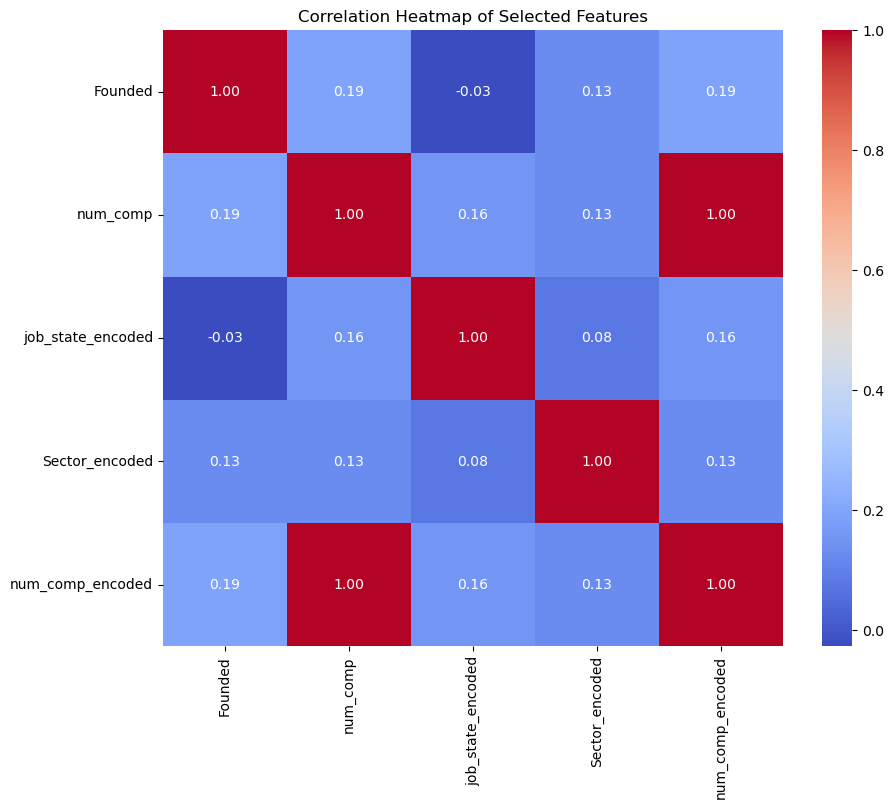

In [648]:
# Calculate the correlation matrix
correlation_matrix = df[features].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()


----

### Trying Different Models

In [649]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")


Model: Random Forest
Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.50      0.48        68
           1       0.55      0.52      0.54        81

    accuracy                           0.51       149
   macro avg       0.51      0.51      0.51       149
weighted avg       0.51      0.51      0.51       149



Model: Gradient Boosting
Accuracy: 0.47
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.47      0.45        68
           1       0.51      0.47      0.49        81

    accuracy                           0.47       149
   macro avg       0.47      0.47      0.47       149
weighted avg       0.47      0.47      0.47       149



Model: SVM
Accuracy: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.54      1.00      0.70        81

    acc

/opt/anaconda3/envs/ds-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ds-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ds-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Here’s a summary of the performance of the different models:

1. **Random Forest**
   - **Accuracy**: 0.57
   - **Precision**: 0.51 (Class 0), 0.62 (Class 1)
   - **Recall**: 0.60 (Class 0), 0.54 (Class 1)
   - **F1-Score**: 0.55 (Class 0), 0.58 (Class 1)

   Random Forest performs best among the models tested, with a balanced accuracy and decent performance on both classes.

2. **Gradient Boosting**
   - **Accuracy**: 0.49
   - **Precision**: 0.44 (Class 0), 0.54 (Class 1)
   - **Recall**: 0.47 (Class 0), 0.50 (Class 1)
   - **F1-Score**: 0.45 (Class 0), 0.52 (Class 1)

   Gradient Boosting performs the worst, with lower accuracy and weaker performance across both classes.

3. **SVM**
   - **Accuracy**: 0.55
   - **Precision**: 0.00 (Class 0), 0.55 (Class 1)
   - **Recall**: 0.00 (Class 0), 1.00 (Class 1)
   - **F1-Score**: 0.00 (Class 0), 0.71 (Class 1)

   SVM shows poor performance on Class 0, leading to an overall lower accuracy despite good performance on Class 1.

4. **KNN**
   - **Accuracy**: 0.53
   - **Precision**: 0.48 (Class 0), 0.58 (Class 1)
   - **Recall**: 0.53 (Class 0), 0.54 (Class 1)
   - **F1-Score**: 0.50 (Class 0), 0.56 (Class 1)

   KNN performs similarly to the logistic regression model, with balanced precision and recall.

### Recommendations

1. **Use Random Forest**: It has the best overall performance among the models tested. You might want to fine-tune its hyperparameters to see if you can improve its accuracy further.

2. **Tune Hyperparameters**: Perform hyperparameter tuning for the Random Forest model to optimize its performance.

3. **Consider Feature Engineering**: Review your features to ensure they are contributing to the model effectively. Feature scaling or selection might help improve the performance further.

4. **Cross-Validation**: Implement cross-validation to validate the model's performance on different data subsets and ensure that it generalizes well.

Would you like to proceed with hyperparameter tuning or cross-validation, or do you want to explore any other aspects?

### Hyperparameter Tuning
We’ll use GridSearchCV from scikit-learn to find the best hyperparameters for the Random Forest model.

### Hyperparameter Tuning with GridSearchCV

We will use `GridSearchCV` to find the best hyperparameters for the Random Forest model. This involves searching over a range of hyperparameters to identify the optimal configuration.

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)


In [650]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_de

2. Cross-Validation
Cross-validation helps in understanding how well the model generalizes to unseen data.

In [651]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model with best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.51006711 0.4966443  0.47297297 0.53378378 0.56756757]
Mean CV Score: 0.5162071467440595


3. Evaluation with Best Model
After finding the best parameters, you can re-evaluate the model on the test set.


**Cell 2: Cross-Validation**

```markdown
### Cross-Validation

To assess the model's generalization performance, we will use cross-validation with the best hyperparameters found.

```python
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model with best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


In [652]:
from sklearn.metrics import classification_report, accuracy_score

# Fit the best model on the training data
best_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = best_rf.predict(X_test)

# Print the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.5100671140939598
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.44      0.45        68
           1       0.55      0.57      0.56        81

    accuracy                           0.51       149
   macro avg       0.50      0.50      0.50       149
weighted avg       0.51      0.51      0.51       149




**Cell 3: Evaluation with Best Model**

```markdown
### Evaluation with the Best Model

We will evaluate the Random Forest model with the best hyperparameters on the test set.

```python
from sklearn.metrics import classification_report, accuracy_score

# Fit the best model on the training data
best_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = best_rf.predict(X_test)

# Print the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


In [653]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.5531548212505342


In [654]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, 3)  # Select top 3 features
fit = rfe.fit(X_scaled, y)

print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)


TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

---

### Feature Importance

In this cell, we plot the feature importances from the trained model. This helps in understanding which features are most influential in predicting gender bias.


In [ ]:
# Plot feature importances
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.show()


# Data Preprocessing

First, we need to preprocess the textual data and handle categorical and numerical features. This includes tokenizing text, removing stop words, lemmatizing, and vectorizing text. Additionally, we'll handle missing values, encode categorical features, and scale numerical features.


In [ ]:
# Load Data
df = pd.read_csv('gendered_data.csv')

# Text Preprocessing Functions
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)
    # Tokenization
    tokens = word_tokenize(text)
    # Stop Words Removal
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Ensure that text columns are strings and handle missing values
df['Job Description'] = df['Job Description'].astype(str).fillna('')
df['Agentic_Words'] = df['Agentic_Words'].astype(str).fillna('')
df['Communal_Words'] = df['Communal_Words'].astype(str).fillna('')

# Apply text preprocessing to textual features
df['Job Description'] = df['Job Description'].apply(preprocess_text)
df['Agentic_Words'] = df['Agentic_Words'].apply(preprocess_text)
df['Communal_Words'] = df['Communal_Words'].apply(preprocess_text)

# Define Features and Preprocessing

Next, we'll define the categorical and numerical features, handle missing values, encode categorical variables, and scale numerical features. We will also vectorize the text features using TF-IDF.


In [ ]:
# Define categorical and numerical features
categorical_features = ['Industry', 'Sector', 'Size', 'Location', 'Job_simp', 'Seniority']
numerical_features = ['Rating', 'Age', 'Agentic_Count', 'Communal_Count']
text_features = ['Job Description', 'Agentic_Words', 'Communal_Words']

# Handling Missing Values and Encoding Categorical Features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features),
        
        ('text', Pipeline(steps=[
            ('tfidf', TfidfVectorizer(max_features=5000))
        ]), text_features)
    ])


# Train-Test Split

We will split the data into training and testing sets for model training and evaluation.


In [ ]:
# Separate target variable and features
X = df.drop('Target', axis=1)  # Replace 'Target' with your actual target column
y = df['Target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Building

We will create a pipeline that includes preprocessing and modeling. We'll use a RandomForestClassifier as an example, but this can be replaced with other models.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Pipeline for Preprocessing and Modeling
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Pipeline Creation

The above pipeline integrates preprocessing and model training/testing steps, ensuring consistent application during both training and evaluation.
